# Multilayer Perceptron from MNIST raw data using Keras

This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

We assume you are using TF 2.

## Loading the packages

In [1]:
# First, import TF and get its version.
import tensorflow as tf
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print(
        'WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'
        .format(tf_version) + '.\033[0m')
else:
    print('OK: TensorFlow >= 2.0.0' + '.\033[0m')

OK: TensorFlow >= 2.0.0.


In [2]:
##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################

import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

# ... import here the different keras libraries you need
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils

%matplotlib inline

## Loading the raw data
Keras provides easy access to different datasets including MNIST. First load the `mnist` dataset and normalize it to be in the range [0, 1]

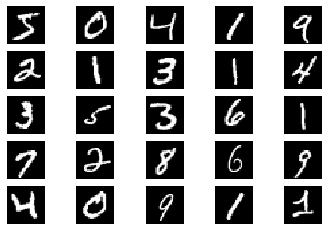

In [3]:
def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0, 5):
        for j in range(0, 5):
            plt.subplot2grid((5, 5), (i, j))
            plt.imshow(X[k], cmap='gray')
            k = k + 1
            plt.axis('off')
    plt.show()


# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

show_imgs(X_train)

In [4]:
X_train  = X_train.reshape(60000, 784)  # change the shape towards (60000, 784)
X_test   = X_test.reshape(10000, 784)   # idem (10000, 784)
X_train  = X_train.astype('float32')    # change the type towards float32
X_test   = X_test.astype('float32')     # idem
X_train  = X_train / 255.0              # normalize the range to be between 0.0 and 1.0
X_test   = X_test / 255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


The target values of the network are supposed to be 1-hot targets. Now the `y_train` is an array with scalar values as in `[5 0 4 1 ...]` and it should be a 1-hot array `Y_train` as in : 

`[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]...]`
 
Note the change of capital letter in the `Y_train` to denote, per convention, an array with multiple dimensions.

In [5]:
n_classes = 10
Y_train = utils.to_categorical(y_train, n_classes)  # modify targets to 1-hot
Y_test = utils.to_categorical(y_test, n_classes)   # idem 
print(Y_train[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


# One-layer network and weight visualisation
## Define the network

In [6]:
D = X_train.shape[1]  # dimension of input sample - 784 for MNIST

# ... define the model as a Sequential type
# ... add a layer of type Dense with softmax activation

model = Sequential()
model.add(Dense(n_classes, input_shape=(D,), activation='softmax'))


# ... print model information with summary() method
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## Compile and train the network
In Keras, we call the methods `compile()` and `fit()`. For the compile phase, we need to specify the **loss** function which should be set in the case of multi-class classification to `categorical_crossentropy`. We also need to specify the optimizer strategy. In this case the `rmsprop` or `adam` can be used.

In [7]:
E = 5                 # number of epochs
B = 128               # batch size

# ... compile the model with a crossentropy loss, rmsprop optimizer 
#      and defining metrics to be stored as history of the training

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# ... call the training with the fit() function giving the tensors as 
#     inputs, defining batch size, number of epochs and validation data

log = model.fit(X_train, Y_train, batch_size=B, epochs=E, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 24us/sample - loss: 0.6092 - accuracy: 0.8465 - val_loss: 0.3445 - val_accuracy: 0.9054
Epoch 2/5
60000/60000 [==============================] - 1s 13us/sample - loss: 0.3310 - accuracy: 0.9086 - val_loss: 0.3002 - val_accuracy: 0.9160
Epoch 3/5
60000/60000 [==============================] - 1s 13us/sample - loss: 0.3019 - accuracy: 0.9155 - val_loss: 0.2866 - val_accuracy: 0.9190
Epoch 4/5
60000/60000 [==============================] - 1s 13us/sample - loss: 0.2884 - accuracy: 0.9197 - val_loss: 0.2799 - val_accuracy: 0.9225
Epoch 5/5
60000/60000 [==============================] - 1s 13us/sample - loss: 0.2802 - accuracy: 0.9222 - val_loss: 0.2741 - val_accuracy: 0.9250


## Evaluate the network

We can do this at three levels: (1) plot of the loss during the training phase, (2) overall accuracy evaluation on test set and (3) per class evaluation with confusion matrix on test set.

### Loss evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

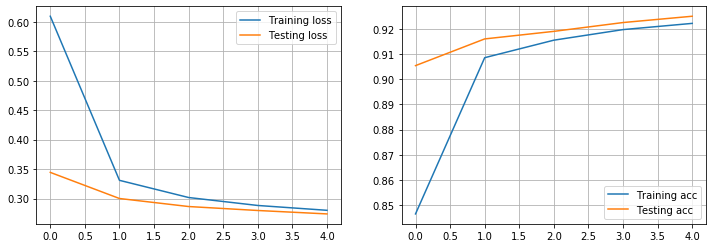

In [8]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

### Model evaluation
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [12]:
loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0) # evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 0.27412036634385584
Test accuracy: 0.925


### Confusion matrix
We can call the `predict_classes()` function to get the predicted classes. The output of this function is an array with the predicted class labels as in `[5 0 4 1 ...]`. The output array of ground truth `y_test` and the predicted classes can then be fed to the `confusion_matrix()` function of [sklearn metrics package](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).

In [15]:
pred = model.predict_classes(X_test, verbose=0)
confusion_matrix(y_test, pred)

array([[ 963,    0,    0,    1,    0,    5,    8,    2,    1,    0],
       [   0, 1114,    2,    2,    0,    1,    4,    2,   10,    0],
       [   8,    7,  922,   16,    9,    3,   12,   11,   40,    4],
       [   4,    0,   22,  915,    0,   25,    2,   12,   23,    7],
       [   2,    1,    3,    1,  915,    0,   11,    2,   10,   37],
       [  10,    2,    4,   30,    8,  775,   17,    5,   35,    6],
       [  12,    3,    6,    1,    8,   11,  912,    2,    3,    0],
       [   1,    5,   25,    5,    6,    0,    0,  958,    4,   24],
       [   7,    6,    7,   19,    9,   25,   10,   13,  874,    4],
       [  11,    7,    1,   10,   31,    8,    0,   32,    7,  902]])

### Plot the weights
The weights connected to a given neuron, when using a one-layer network, have the same shape as the input. They can therefore be plot. To do so we need to re-scale the weight values into 0-255 pixel values.

(784, 10)
(10,)


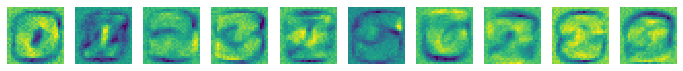

In [17]:
weights = model.get_weights()
for w in weights:
    print(w.shape)
w1 = weights[0]
f = plt.figure(figsize=(12, 12))
for i in range(10):
    ax = f.add_subplot(1, 10, 1 + i)
    im = w1[:, i]  # get the weights landing to neuron i
    im = im.reshape(28, 28)  # reshape the vector of weights into 28x28 image
    # now put back the pixel values to 0-256 doing a min-max norm and multiplying by 256
    min = im.min()  # get the min of im
    max = im.max()  # get the max of im
    im = (im - min) / (max - min) * 255  # perform a min-max norm
    im = im.round().astype('int')  # round and convert to int
    ax.axis('off')
    ax.imshow(im)